# disease_RA_0

整理GSE127465数据集,最后输出`cache/parameter_RA.csv`

更新时间 2024年3月26日

[human Amp-Phase-1](https://singlecell.broadinstitute.org/single_cell/study/SCP279/amp-phase-1)

[human SDY997](https://www.immport.org/shared/study/SDY997)

[mouse RA_GSE145286](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE145286)

[mouse RA_SCP469](https://singlecell.broadinstitute.org/single_cell/study/SCP469/synovial-fibroblast-positional-identity-controlled-by-inductive-notch-signaling-underlies-pathologic-damage-in-inflammatory-arthritis?cluster=UMAP%20mouse&spatialGroups=--&annotation=cell_type--group--study&subsample=all#study-visualize)

In [1]:
import sys
from pathlib import Path
p_root = Path('~/link/res_publish').expanduser()
None if str(p_root) in sys.path else sys.path.append(str(p_root))

In [2]:
from func import *

/public/workspace/licanchengup/apps/miniconda3/envs/publish/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-05-07 17:34:24.309255: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.



-------------------------help-------------------------
> parameter
    p_root	[name] res_publish
        p_run, p_plot, p_res, p_cache, p_pdf
    p_df_varmap
    map_sp_reverse
    rng
> run
    run_cross_species_models
    h5ad_to_mtx
    load_adata
    get_path_varmap
    find_path_from_para
    load_normalized_adata

> res
    get_test_result_df
    get_res_obs
    get_adata_umap
    show_umap

> plot
    get_color_map
    show_color_map
    show_color
    plot_umap
    savefig



# [human Amp-Phase-1](https://singlecell.broadinstitute.org/single_cell/study/SCP279/amp-phase-1)

single-cell RNA expression in sorted cell populations (n=21, Fig. 1b).

In [3]:
p_root = p_cache.joinpath('disease', 'RA_AMP-Phase-1')
print("cd '{}'".format(p_root))
p_temp = p_cache.joinpath('disease', 'temp_RA_AMP-Phase-1.h5ad')

cd '/public/workspace/licanchengup/link/res_publish/run/cache/disease/RA_AMP-Phase-1'


[human Amp-Phase-1 : t-SNE coordinates RA.json](https://singlecell.broadinstitute.org/single_cell/api/v1/studies/SCP279/clusters/t-SNE%20coordinates%20RA?annotation_name=Cluster&annotation_scope=study&annotation_type=group&fields=coordinates%2Ccells%2Cannotation&subsample=all)

In [4]:
adata = None
if p_temp.exists():
    print('[has existsed] {}'.format(p_temp.name))
    adata = sc.read_h5ad(p_temp)
else:
    adata = pd.read_csv(
        p_root.joinpath(
            'SDY998/ResultFiles/RNA_sequencing_result',
            'celseq_matrix_ru10_molecules.tsv.725585.gz'),
        sep="\t", index_col=0
    ).fillna(0).transpose()
    adata = sc.AnnData(adata)
    adata
    df_meta = pd.DataFrame(
        loads(p_root.joinpath("t-SNE coordinates RA.json").read_text())["data"]
    )
    assert df_meta['cells'].is_unique, '[Error] not unique'
    df_meta.index = df_meta['cells'].to_numpy()
    df_meta = df_meta.drop(columns='cells')

    df_meta = df_meta.join(pd.read_csv(
        p_root.joinpath(
            'SDY998/ResultFiles/RNA_sequencing_result',
            'celseq_meta.tsv.725591.gz'), sep="\t", index_col=0
    ).loc[:, 'sample,type,disease'.split(',')])
    display(df_meta.head(2), df_meta.size)
    adata = adata[adata.obs.index.isin(df_meta.index), :]
    adata.obs = adata.obs.loc[:, []].join(df_meta)
    adata.X = csr_matrix(adata.X)
    display(type(adata.X))
    adata.write_h5ad(p_temp)
    print('[out] {}'.format(p_temp.name))
display(
    adata,
    adata.obs.head(2),
    adata.obs.shape,
    adata.obs['sample'].unique().size)

[has existsed] temp_RA_AMP-Phase-1.h5ad


AnnData object with n_obs × n_vars = 5265 × 29420
    obs: 'annotations', 'x', 'y', 'sample', 'type', 'disease'

,annotations,x,y,sample,type,disease
S006_L1Q1_A03,SC-T1,8.720527,-9.586673,301-0159,T cell,OA
S006_L1Q1_A05,SC-T4,11.419902,-12.422794,301-0159,T cell,OA


(5265, 6)

21

/public/workspace/licanchengup/apps/miniconda3/envs/publish/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/public/workspace/licanchengup/apps/miniconda3/envs/publish/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/public/workspace/licanchengup/apps/miniconda3/envs/publish/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired v

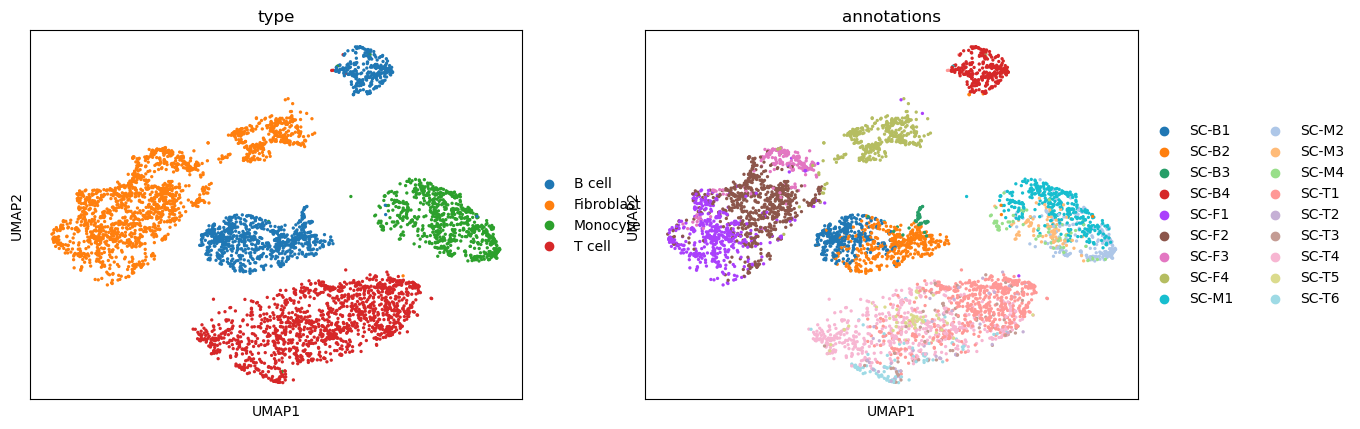

In [5]:
adata.obsm['X_umap'] = adata.obs.loc[:, ['x', 'y']].to_numpy()
sc.pl.umap(adata, color='type,annotations'.split(','))

cell_type
fibroblast    1844
T cell        1529
B cell        1142
macrophage     750
Name: count, dtype: int64

sub_cell_type
                          2671
HLA-DRA hi sublining       719
CD34+ sublining            484
lining                     413
IL1B+ pro-inflammatory     349
NUPR1+                     237
DKK3 + sublining           228
C1QA+                       93
IFN-activated               71
Name: count, dtype: int64

/public/workspace/licanchengup/apps/miniconda3/envs/publish/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/public/workspace/licanchengup/apps/miniconda3/envs/publish/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/public/workspace/licanchengup/apps/miniconda3/envs/publish/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired v

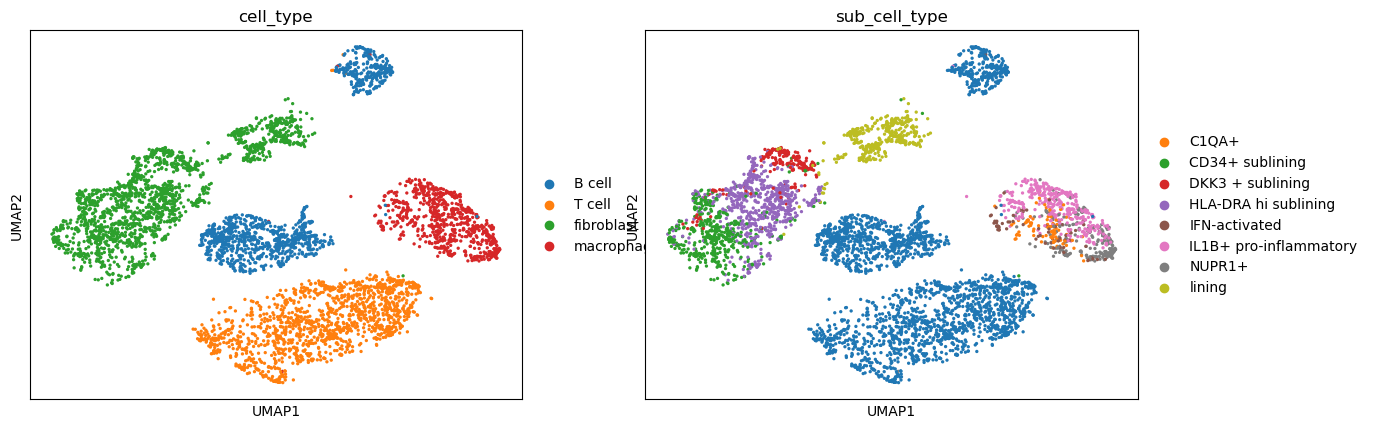

In [6]:
adata.obs['_batch'] = adata.obs.apply(
    lambda row: '{disease}_{sample}'.format(**row), axis=1)
adata.obs["cell_type"] = (
    adata.obs["annotations"] .str.extract(
        "SC-(\\w)\\d",
        expand=False) .map(
            {
                "M": "macrophage",
                "F": "fibroblast",
                "B": "B cell",
                "T": "T cell"}))
adata.obs["sub_cell_type"] = adata.obs["annotations"].map(
    lambda x:
    {
        'SC-F1': 'CD34+ sublining',
        'SC-F2': 'HLA-DRA hi sublining',
        'SC-F3': 'DKK3 + sublining',
        'SC-F4': 'lining',
        'SC-M1': 'IL1B+ pro-inflammatory',
        'SC-M2': 'NUPR1+',
        'SC-M3': 'C1QA+',
        'SC-M4': 'IFN-activated',
    }.setdefault(x, '')
)

display(adata.obs["cell_type"].value_counts(),
        adata.obs["sub_cell_type"].value_counts())
sc.pl.umap(adata, color='cell_type,sub_cell_type'.split(','))

In [7]:
adata.obs = adata.obs.loc[:,
                          '_batch,disease,cell_type,sub_cell_type,sample,type,annotations,x,y'.split(',')]
h5ad_to_mtx(adata, p_cache.joinpath('disease', 'RA_h_all_Amp-Phase-1'))

_adata = adata[adata.obs['cell_type'] == 'fibroblast', :]
display(_adata.obs['cell_type'].value_counts(dropna=False),
        _adata.obs['sub_cell_type'].value_counts(dropna=False))
h5ad_to_mtx(
    _adata,
    p_cache.joinpath(
        'disease',
        'RA_h_fibroblast_Amp-Phase-1'))

frist 10 adata.X nonzero elements:
 [[1 1 1 1 1 1 1 1 1 4]]
[out] /public/workspace/licanchengup/link/res_publish/run/cache/disease/RA_h_all_Amp-Phase-1


cell_type
fibroblast    1844
Name: count, dtype: int64

sub_cell_type
HLA-DRA hi sublining    719
CD34+ sublining         484
lining                  413
DKK3 + sublining        228
Name: count, dtype: int64

/public/workspace/licanchengup/link/res_publish/func.py:1128: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var["gene_names"] = adata.var_names.to_numpy()


frist 10 adata.X nonzero elements:
 [[1 1 2 1 3 1 2 2 1 1]]
[out] /public/workspace/licanchengup/link/res_publish/run/cache/disease/RA_h_fibroblast_Amp-Phase-1


In [8]:
del p_root, p_temp, adata, _adata

# [mouse RA_GSE145286](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE145286)

In [9]:
def load_adata_frome_mtx(row, show=True):
    adata = sc.read_mtx(row['counts']).T
    df_obs = pd.read_csv(row['barcodes'], index_col=0, header=None)
    df_obs.index.name = None
    df_obs['gse_id'] = row.name

    df_var = pd.read_csv(row['genes'], index_col=0, header=None)
    df_var.index.name = None
    adata.obs = df_obs
    adata.var = df_var

    display(
        row.name.ljust(50, '-'),
        adata,
        adata.shape,
        adata.obs.head(),
        adata.obs.shape,
        adata.var.head(),
        adata.var.shape) if show else None
    return adata


p_root = p_cache.joinpath('disease', 'RA_GSE145286')
print("cd '{}'".format(p_root))
p_temp = p_cache.joinpath('disease', 'temp_RA_GSE145286.h5ad')

cd '/public/workspace/licanchengup/link/res_publish/run/cache/disease/RA_GSE145286'


In [10]:
adata = None
if p_temp.exists():
    print('[has existsed] {}'.format(p_temp.name))
    adata = sc.read_h5ad(p_temp)
else:
    df_path = pd.DataFrame({'path': [i for i in p_root.joinpath(
        'GSE145286_RAW').iterdir() if i.match('*sample*')]})
    df_path['name'] = df_path['path'].apply(lambda x: x.stem)
    df_path = df_path.join(df_path['name'].str.extract(
        "(?P<gse_id>GSM\\d+)_(?P<type>\\w+)_(?P<sample>sample\\d)\\."))
    df_path = df_path.pivot(index='gse_id', columns='type', values='path')
    df_path

    adata = {i: load_adata_frome_mtx(row, show=False)
             for i, row in df_path.iterrows()
             }
    
    adata = sc.concat(adata)

    df_meta = pd.read_csv(p_root.joinpath('SCP469/metadata/metaData.txt'),
                          sep='\t',
                          index_col=0,
                          skiprows=[1]).loc[:,
                                            'sampleID,status,label,cell_type,cell_subtype'.split(',')]
    adata[adata.obs.index.isin(df_meta.index), :]
    adata.obs = adata.obs.loc[:, []].join(df_meta)
    display(adata.obs.head(2),adata.obs.shape)
    adata.X = csr_matrix(adata.X)
    display(type(adata.X))
    adata.write_h5ad(p_temp)
    print('[out] {}'.format(p_temp.name))

display(adata,adata.obs.head(2), adata.obs.size, adata.obs.index.is_unique,
        adata.var.head(2), adata.var.size, adata.var.index.is_unique)

[has existsed] temp_RA_GSE145286.h5ad


AnnData object with n_obs × n_vars = 18491 × 31017
    obs: 'sampleID', 'status', 'label', 'cell_type', 'cell_subtype'

,sampleID,status,label,cell_type,cell_subtype
AAACCTGAGAACAATC_BRI203,BRI203,ctrl,WT,perivascular,perivascular
AAACCTGAGCTCCCAG_BRI203,BRI203,ctrl,WT,sublining,sublining


92455

True

""
0610005C13Rik
0610006L08Rik


0

True

In [11]:
adata.obs['label'] = adata.obs['label'].map({k: v for k, v in zip(
    'WT,KO,ISO,N3'.split(','), 'WT,KO-Notch3,WT ISO,WT anti-NRR3'.split(','))})
adata.obs['cell_type']= adata.obs['cell_type'].map({'arterial': 'endothelial cell',
 'bcell': 'B cell',
 'chondrocytes': 'chondrocyte',
 'intermediate': 'fibroblast',
 'lining': 'fibroblast',
 'myeloid': 'macrophage',
 'neutrophil': 'neutrophil',
 'pericyte_VSMC': 'pericyte',
 'perivascular': 'fibroblast',
 'sublining': 'fibroblast',
 'tcell': 'T cell',
 'venous': 'endothelial cell'})
adata.obs = adata.obs.rename(columns = {'cell_subtype':'sub_cell_type'})
adata.obs['status'] = adata.obs['status'].map({'ctrl': 'Healthy',
 'case': 'RA'})
adata.obs['_batch'] =adata.obs.apply(lambda row:'{status};{label};{sampleID}'.format(**row),axis=1)
adata.obs = adata.obs.loc[:,'_batch,status,label,sampleID,cell_type,sub_cell_type'.split(',')]
display(adata.obs.head(2),group_agg(adata.obs,['status','label'],{'label':['count']},reindex=False))

,_batch,status,label,sampleID,cell_type,sub_cell_type
AAACCTGAGAACAATC_BRI203,Healthy;WT;BRI203,Healthy,WT,BRI203,fibroblast,perivascular
AAACCTGAGCTCCCAG_BRI203,Healthy;WT;BRI203,Healthy,WT,BRI203,fibroblast,sublining


label
                     count
status  label             
RA      WT ISO        3191
        KO-Notch3     2666
        WT anti-NRR3  2109
        WT            2452
Healthy WT ISO           0
        KO-Notch3     5096
        WT anti-NRR3     0
        WT            2977

In [12]:
h5ad_to_mtx(adata, p_cache.joinpath('disease', 'RA_m_all_GSE145286'))

_adata = adata[adata.obs['cell_type'] == 'fibroblast', :]
display(_adata.obs['cell_type'].value_counts(dropna=False),
        _adata.obs['sub_cell_type'].value_counts(dropna=False))
h5ad_to_mtx(
    _adata,
    p_cache.joinpath(
        'disease',
        'RA_m_fibroblast_GSE145286'))

frist 10 adata.X nonzero elements:
 [[1 1 1 1 2 2 1 1 1 1]]
[out] /public/workspace/licanchengup/link/res_publish/run/cache/disease/RA_m_all_GSE145286


cell_type
fibroblast    11707
Name: count, dtype: int64

sub_cell_type
sublining       6624
intermediate    2279
lining          2004
perivascular     800
Name: count, dtype: int64

/public/workspace/licanchengup/link/res_publish/func.py:1128: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var["gene_names"] = adata.var_names.to_numpy()


frist 10 adata.X nonzero elements:
 [[1 1 1 1 2 2 1 1 1 1]]
[out] /public/workspace/licanchengup/link/res_publish/run/cache/disease/RA_m_fibroblast_GSE145286


In [13]:
del p_root, p_temp, adata, _adata

# info and parameter

In [14]:
info = pd.DataFrame({
    'path': p_cache.joinpath('disease').iterdir()
})
info['name'] = info['path'].apply(lambda x: x.name)
info = info[info['path'].apply(lambda x:x.joinpath('matrix.mtx').exists())]
info = info[info['path'].apply(lambda x: x.match('*/RA_*'))]
info = info.join(info['name'].str.extract('^RA_(?P<sp_simple>[^_]+)_(?P<tag>[^_]+)'))
# info['sp'] = ''
# info['sp'] =info['sp'].mask(info['name'].str.contains('GSE145286'),'mouse').mask(info['name'].str.contains('Amp-Phase'),'human')
info['sp'] = info['sp_simple'].map(map_sp)
info['name'] = info.apply(lambda row:'RA{}{}'.format(row['sp_simple'],row['tag'][:3]),axis=1)
info['tissue'] = 'RA'
info['path'] = info['path'].apply(lambda x:x.relative_to(p_cache))
info.to_csv(p_cache.joinpath('info_RA.csv'),index=False)
info.head(2)
info

,path,name,sp_simple,tag,sp,tissue
4,disease/RA_h_fibroblast_Amp-Phase-1,RAhfib,h,fibroblast,human,RA
10,disease/RA_m_fibroblast_GSE145286,RAmfib,m,fibroblast,mouse,RA
32,disease/RA_h_all_Amp-Phase-1,RAhall,h,all,human,RA
33,disease/RA_m_all_GSE145286,RAmall,m,all,mouse,RA


In [15]:
df_para = pd.merge(
    info.query("sp == 'human'"),
info.query("sp == 'mouse'"),
on=['tissue','tag'],suffixes=('_ref','_que')
)
df_para['key_cell_type'] = df_para['tag'].apply(lambda x:"cell_type" if x == "all" else "sub_cell_type")
df_para = df_para.query("tag == 'fibroblast'")
df_para = df_para.drop(columns=['tag'])
display(df_para)
print(*df_para.columns,sep='\n')

,path_ref,name_ref,sp_simple_ref,sp_ref,tissue,path_que,name_que,sp_simple_que,sp_que,key_cell_type
0,disease/RA_h_fibroblast_Amp-Phase-1,RAhfib,h,human,RA,disease/RA_m_fibroblast_GSE145286,RAmfib,m,mouse,sub_cell_type


path_ref
name_ref
sp_simple_ref
sp_ref
tissue
path_que
name_que
sp_simple_que
sp_que
key_cell_type


In [16]:
df_para.to_csv(p_cache.joinpath('parameter_RA.csv'),index=False)
print("\n[finish]\n".center(100,"-"))

---------------------------------------------
[finish]
---------------------------------------------
